In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Jouer avec les digits

In [33]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

**Question** Afficher et lire la description de ces données (attribut `DESCR`)

In [34]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

**Question** Appeler `X` et `y` les données et la cible. Découper en `X_train`, `y_train`, `X_test`, `y_test` selon les indications données dans la description.

In [35]:
from sklearn.model_selection import train_test_split
X= mnist.data
y = mnist.target

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

On peut visualiser quelques digits par ce petit code

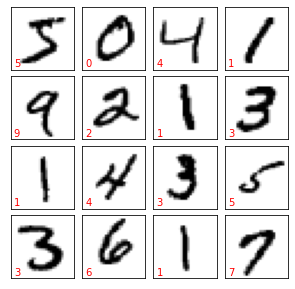

In [37]:
fig, axes = plt.subplots(4, 4, figsize=(5, 5),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw={'hspace':0.1, 'wspace':0.1})
for i,ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28,28), cmap='binary')
    ax.text(0.05, 0.05, str(y[i]),
            transform=ax.transAxes, 
            color='red')

**Question** Créer  4 classifieurs de classe suivante. On prendra 5 voisins pour le $k$-plus proches voisins, et une profondeur de 20 pour les arbres de décision. Les mémoriser dans une liste `methods` pour plus de facilité.  

In [38]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [46]:
gnb = GaussianNB()
svc = SVC()
sgd = SGDClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
knn = KNeighborsClassifier(5)
methods = [gnb, dt, sgd, knn, lr, svc]

On considère les tailles de 100 à 4100 par pas de 1000. Par la suite on prendra des sous-échantillon de `X_train` tiré au hasard des tailles considérées (vous jouerez sur les indices plutôt que sur les données!!)

    sizes = list(range(100, 5000, 1000)) 

In [47]:
sizes = list(range(100, 5000, 1000)) 
sizes

[100, 1100, 2100, 3100, 4100]

# Mesurer les temps d'exécution

**Question** Regardez la documentation de %timeit

In [48]:
%timeit?

**Question** Que fait l'instruction ? 

    r = %timeit -o -q -r1 -n1 mon_appel_de_fonction

*Réponse* : Exécutez mon_appel_de_fonction une fois et répétez une fois , renvoie le temps de fonctionnement le plus court，sans imprimer les résultats

**Question** Remarquez ce que donne 
  
    <instance_de_methode_de_classif>.__class__.__name__

In [49]:
dt.__class__.__name__

'DecisionTreeClassifier'

**Question** En utilisant cela, faites le diagramme suivant :

![temps d'exécution](./temps.png)

Dans chaque courbe, les modèles sont entraînés sur les mêmes données, qui sont des sous échantillons de `X_train` tirés au hasard de chaque taille de la liste `sizes`. 

In [50]:
X_train[:5],y_train[:5]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['3', '2', '2', '1', '2'], dtype=object))

In [ ]:
for m in methods:
    time_list = []
    for i in sizes:
        t = %timeit -o -q -r1 -n1 m.fit(X_train[:i],y_train[:i])
        time_list.append(t.timings)
    plt.plot(sizes,time_list)
plt.set_ylabel('Temps(s)')

/home/zhou/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zhou/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

# Mesurer les scores

**Question** Importer cross_val_score et lire la documentation

**Question** Tracer les courbes suivantes obtenues avec cross_val_score sur les différentes tailles. 

![precision](./acc.png)

(et vous voulez, car c'est plus joli... :-) )

![precision enveloppe](./acc_b.png)

# Matrice de confusion

On change de problème de classification en un problème binaire de détermination si un digit est le '3'.

In [ ]:
y_train3 = (y_train == '3')
y_test3 = (y_test == '3')

**Question** Sélectionnez 5000 indices au hasard de X_train pour travailler sur un sous échantillon (nommé `Xs`, `ys`). Découpez ce sous-échantillon pour avoir un échantillon d'apprentissage et de validation. 

**Question** Entraînez tous les classifieurs sur ce sous-échantillon et calculer dans un dictionnaire `pred` toutes les prédictions de chaque méthode sur l'échantillon de validation. 

**Question** Calculer les matrices de confusion pour `lr` et `sgd`. Affichez aussi les matrices de confusion de façon graphique (`plot_confusion_matrix`)


In [ ]:
from sklearn import metrics 

**Question** En étudiant la matrice de confusion avec les prédictions dans `pred[lr]`, calculez 1 - le taux d'erreur (accuracy), la précision,  le rappel (sans utiliser les fonctions de `sklearn`).

En interprétant le problème comme un problème multi-classe, calculez la précision en micro et macro average

**Question**  Affichez les mêmes résultats maintenant avec les fonctions de `sklearn`. 

**Question** Utilisez `classification_report` pour afficher les résultats sur l'échantillon `valid` par les méthodes `lr` et `sgd`

# Fonction de décision et courbe ROC

**Question** Affichez les 10 premiers scores calculés par `lr.decision_function` et les 10 premières étiquettes de l'échantillon de validation.

**Question** En utilisant `precision_recall_curve` sur les valeurs de la fonction de décision de `lr` faites le dessin suivant 

![precision et rappel selon le seuil](./prec_rec_thres.png)

**Question** Interprétez-le, en particulier les valeurs aux extrémités du graphe.

*Réponse*

**Question** Utilisez maintenant `plot_precision_recall_curve` pour tracer la courbe de précision contre rappel pour `lr`. Interprétez ce résultat.

*Réponse interprétation*